# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [16]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [17]:
#a)
wine <- read_csv("wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
#b)
names(wine)

[1] "Alcohol"                      "Malicacid"                   
 [3] "Ash"                          "Alcalinity_of_ash"           
 [5] "Magnesium"                    "Total_phenols"               
 [7] "Flavanoids"                   "Nonflavanoid_phenols"        
 [9] "Proanthocyanins"              "Color_intensity"             
[11] "Hue"                          "0D280_0D315_of_diluted_wines"
[13] "Proline"                      "class"

In [19]:
#c)
summary(wine[sapply(wine, is.numeric)])

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [20]:
#a)
library(dplyr)
wine_scaled <- wine %>%
  mutate(across(-class, ~ as.numeric(scale(.))))


b) Scaling and centering this data would be helpful before performing a PCA because these numerical values are all on different scales. For example, the variable "Proline" seems to range from 278 to 1680 while a varibale like "Hue" is from only 0.4800 to 1.7100. These are very different scales and scaling and centering would not make sure the data is not skewed by the variables that may just have a range that are higher numbers because of how it is measured. 

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [21]:
#a)
wine_pca <- prcomp(wine_scaled %>% select(-class), center = FALSE, scale. = FALSE)

In [22]:
#b)
summary(wine_pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

c)PCA is performed first because it simplifies the data and takes out data that is not helpful.

In [23]:
#d)
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


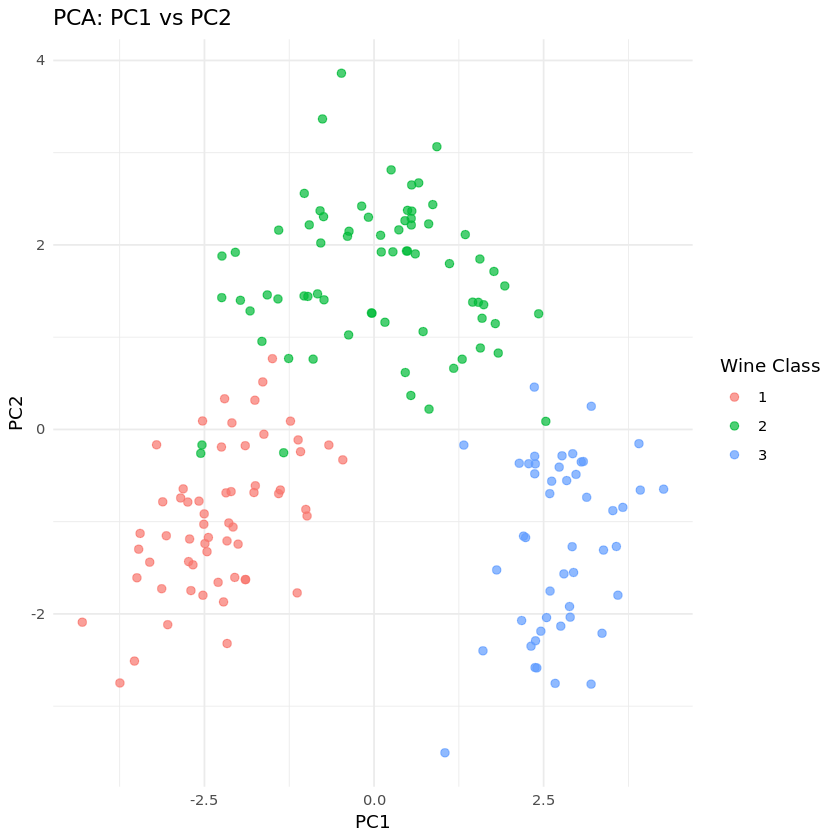

In [24]:
#e)
library(ggplot2)

wine_scores <- as.data.frame(wine_pca$x) %>%
  mutate(class = wine_scaled$class)

ggplot(wine_scores, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2, alpha = 0.7) +
  labs(title = "PCA: PC1 vs PC2", color = "Wine Class") +
  theme_minimal()


f) This plot shows that the wine classes cluster clearly in a plot of PC1 and PC2. Therefore, a 2 dimensional plot can show wine classes and variety pretty well. 

g)PCA would fail if the data is only categorical. This is because variance does not have any meaning in the data. It would also fail when the structure of the plot is non-linear.

h) A vector space is a flat plane (like paper). A manifold, however, is folded or crumpled. We ust perfomred a PCA which only works in a vector space because PCA needs that flat/straight environment. t-SNE, though, can simplfy the maifold space and reveal the data patterns by un-crumbling the structure. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [25]:
#a)
library(Rtsne)
set.seed(123)
wine_pca_scores <- as.data.frame(wine_pca$x)
wine_subset <- wine_pca_scores[, 1:10]
wine_tsne <- Rtsne(wine_subset, dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.396099 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.127538 (50 iterations in 0.01 seconds)
Iteration 150: error is 50.598560 (50 iterations in 0.01 seconds)
Iteration 200: error is 50.140847 (50 iterations in 0.01 seconds)
Iteration 250: error is 50.024571 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.632583 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.376300 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.367101 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.366323 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.364658 (50 iterations in 0.01 seconds)
Fitting performed in 0.12 seconds.


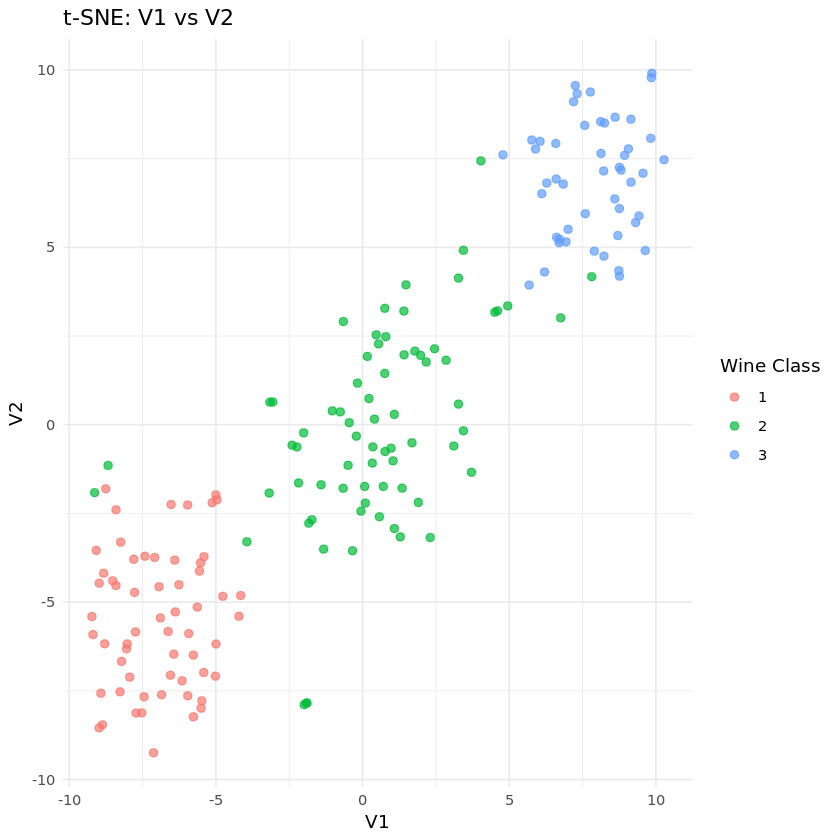

In [26]:
#b)
wine_tsne_scores <- as.data.frame(wine_tsne$Y)
wine_tsne_scores$class <- wine_scaled$class

library(ggplot2)
ggplot(wine_tsne_scores, aes(x = V1, y = V2, color = factor(class))) +
  geom_point(size = 2, alpha = 0.7) +
  labs(title = "t-SNE: V1 vs V2", color = "Wine Class") +
  theme_minimal()

c) We did not stop at PCA becuase PCA is a linear transformation only. Performing t-SNE can model the data more accurately espesically for complex data sets. Comparing this model to the PCA model, it is clear that the t-SNE separates the data more clearly. 

d) This workflow would make sense for datasets with many numerical variabels that may have non-linear relationships. I have a background in data science in the humanities and I think that this workflow could be helpful for text analysis. For example, if I had an archive that consisted of every edition of long running, magazine or anthology series PCA could be used to find important word frequencies between different types of documents (poetry, articles, stories, books, etc.) or different subject matters/themes (mystery, pastoral, love, etc.). Then, t-SNE could be applied to plot these different documents by topic or type of document to test a model or analyze the archive. 